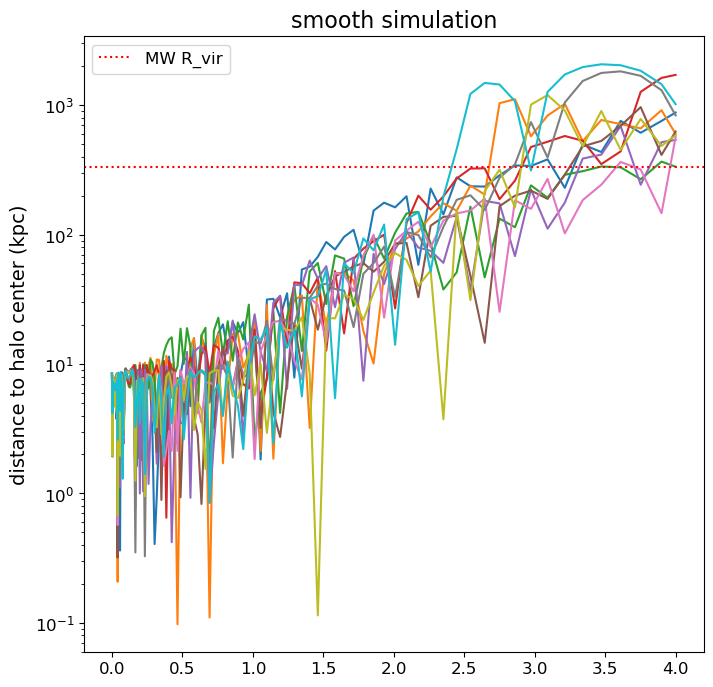

In [3]:
from shared.preface import *
import shared.functions as fct


def velocity_batches_plot(sim, fname, method, Rvir, batches=False):

    fig, ax = plt.subplots(1,1)

    # Load positions and velocities.
    vel = fct.load_sim_data(sim, fname, 'velocities')
    pos = fct.load_sim_data(sim, fname, 'positions')

    # Magnitudes of velocities and radial distances from halo center.
    mag = np.sqrt(np.sum(vel**2, axis=2))
    dis = np.sqrt(np.sum(pos**2, axis=2))

    # Sort arrays from low to high velocity neutrinos.
    ids = mag[:,0].argsort()
    ids_2D = np.repeat(np.expand_dims(ids, axis=1), mag.shape[1], axis=1)
    u_unit = (kpc/s)/(km/s)
    mag_sort = np.take_along_axis(mag, ids_2D, axis=0)*u_unit
    dis_sort = np.take_along_axis(dis, ids_2D, axis=0)

    # Special velocity markers.
    v_start = mag_sort[:,0]
    v_max = v_start.max()
    v_esc = mag_sort[np.where(v_start <= 550)]

    # Velocity batches.
    v1 = mag_sort[np.where(v_start <= v_max/4)]
    v2 = mag_sort[
        np.where((v_max/4 < v_start) & (v_start <= v_max/2))
    ]
    v3 = mag_sort[
        np.where((v_max/2 < v_start) & (v_start <= v_max*3/4))
    ]
    v4 = mag_sort[np.where(v_max*3/4 < v_start)]

    # Corresponding distance batches.
    d1 = dis_sort[:len(v1),:]
    d2 = dis_sort[len(v1):len(v1)+len(v2),:]
    d3 = dis_sort[len(v1)+len(v2):len(v1)+len(v2)+len(v3),:]
    d4 = dis_sort[len(v1)+len(v2)+len(v3):,:]
    # d_esc = dis_sort[:v_esc.shape[0],:]

    # Print some stats.
    print_yesno = False
    if print_yesno:
        print(f'Method: {method}')
        print('vel patches:', v1.shape, v2.shape, v3.shape, v4.shape)
        print(
            'Velocity edges for each batch: \n', 
            f'Batch 1: {v1[0,0]} to {v1[-1,0]} check: {v_max/4} \n',
            f'Batch 2: {v2[0,0]} to {v2[-1,0]} check: {v_max/2} \n',
            f'Batch 3: {v3[0,0]} to {v3[-1,0]} check: {v_max*3/4} \n',
            f'Batch 3: {v4[0,0]} to {v4[-1,0]} check: {v_max}',
        )
        print('dis patches:', d1.shape, d2.shape, d3.shape, d4.shape)

    if batches == True:
        for i, d in enumerate((d1,d2,d3,d4)):
            print(d.shape, d[0,0], d[0,-1])
            y_vals = np.mean(d, axis=0)
            ax.semilogy(ZEDS, y_vals, alpha=0.7, label=f'batch {i} mean')
    else:
        d_low = dis_sort[:3000,:][::300]   #! lowest velocities
        # d_low = dis_sort[3000:,:][::1000]  #! highest velocities
        for d in d_low:
            ax.semilogy(ZEDS, d)

    ax.axhline(Rvir/kpc, c='r', ls=':', label='MW R_vir')
    # ax[j].set_xlim(-0.01,1)
    ax.legend()
    ax.set_title(f'{method} simulation')
    ax.set_ylabel('distance to halo center (kpc)')

    if j == 1:
        ax.set_xlabel('redshift')

    plt.savefig(f'figures/velocity_batches_{method}.pdf')
    plt.show()


nus = 10000
MW_HALO = True
VC_HALO = False
AG_HALO = False
halos = 'MW'*MW_HALO + '+VC'*VC_HALO + '+AG'*AG_HALO

sim = 'LinfNinf'
fname = f'nus_{nus}_halos_{halos}_{SOLVER}'

velocity_batches_plot(sim, fname, 'smooth', Rvir_MW, batches=False)


# sim = 'L012N376'
# mass_gauge = 12.4  # in log10 Msun
# mass_range = 0.3
# batchname = f'1e+{mass_gauge}_pm{mass_range}Msun'
# halo_batch_params = np.load(f'{sim}/halo_batch_{batchname}_params.npy')
# halo_j = 1
# halo_Rvir = halo_batch_params[0,halo_j]*kpc
# hname = f'{batchname}_halo{halo_j}'
# fname = f'{nus}nus_{hname}'

# velocity_batches_plot(sim, fname, 'discrete', halo_Rvir, batches=False)

In [ ]:
from shared.preface import *
import shared.functions as fct

for z, zsnap in zip(ZEDS, ZEDS_SNAPSHOTS[::-1]):
    print(np.round(z,4), np.round(zsnap,4))